# Exploratory Data Analysis of Albany, NYC Airbnb Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
path='C:/Zcommon/trainee/project_1/albany_nyc_cleaned_dataset.csv'
df=pd.read_csv(path)
df.head()

,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,...,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,has_reviews,first_review_missing,last_review_missing,days_since_first_review,days_since_last_review,has_availability_miss,superhost_missing
0,2025-10-05,2013-01-07,unknown,100.0,50.0,0,1,5,t,t,...,0,0,0.07,1,0,0,4164,1195,0,0
1,2025-10-06,2014-08-07,within an hour,100.0,100.0,1,5,5,t,t,...,0,0,2.29,1,0,0,4119,112,0,0
2,2025-10-06,2015-03-13,within an hour,100.0,99.0,0,2,2,t,t,...,1,0,2.94,1,0,0,3853,70,0,0
3,2025-10-05,2014-08-07,within an hour,100.0,100.0,1,5,5,t,t,...,0,0,2.64,1,0,0,3823,147,0,0
4,2025-10-05,2014-07-07,unknown,100.0,100.0,1,1,1,t,t,...,0,0,5.58,1,0,0,3396,113,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 64 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  425 non-null    object 
 1   host_since                                    425 non-null    object 
 2   host_response_time                            425 non-null    object 
 3   host_response_rate                            425 non-null    float64
 4   host_acceptance_rate                          425 non-null    float64
 5   host_is_superhost                             425 non-null    int64  
 6   host_listings_count                           425 non-null    int64  
 7   host_total_listings_count                     425 non-null    int64  
 8   host_has_profile_pic                          425 non-null    object 
 9   host_identity_verified                        425 non-null    obj

## Visualization of the data

### Starting with plots

### @Price distribution using histogram

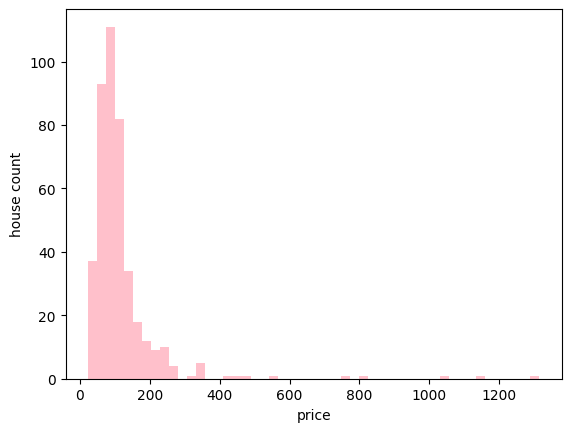

In [5]:
plt.hist(df['price'],bins=50,color='pink')
plt.xlabel('price')
plt.ylabel('house count')
plt.show()

### @Price distribution using boxplot.

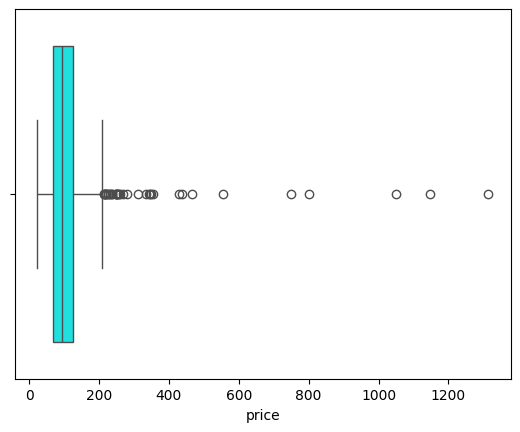

In [6]:
sns.boxplot(x=df['price'],color='cyan')
plt.show()

#### This tells us that most frequent bookings were in the price range of ~$50-~$200, with prices increasing from there on and then going beyond what an average american afford for a bnb.

### @If the host identity is verified then how does it affect the price

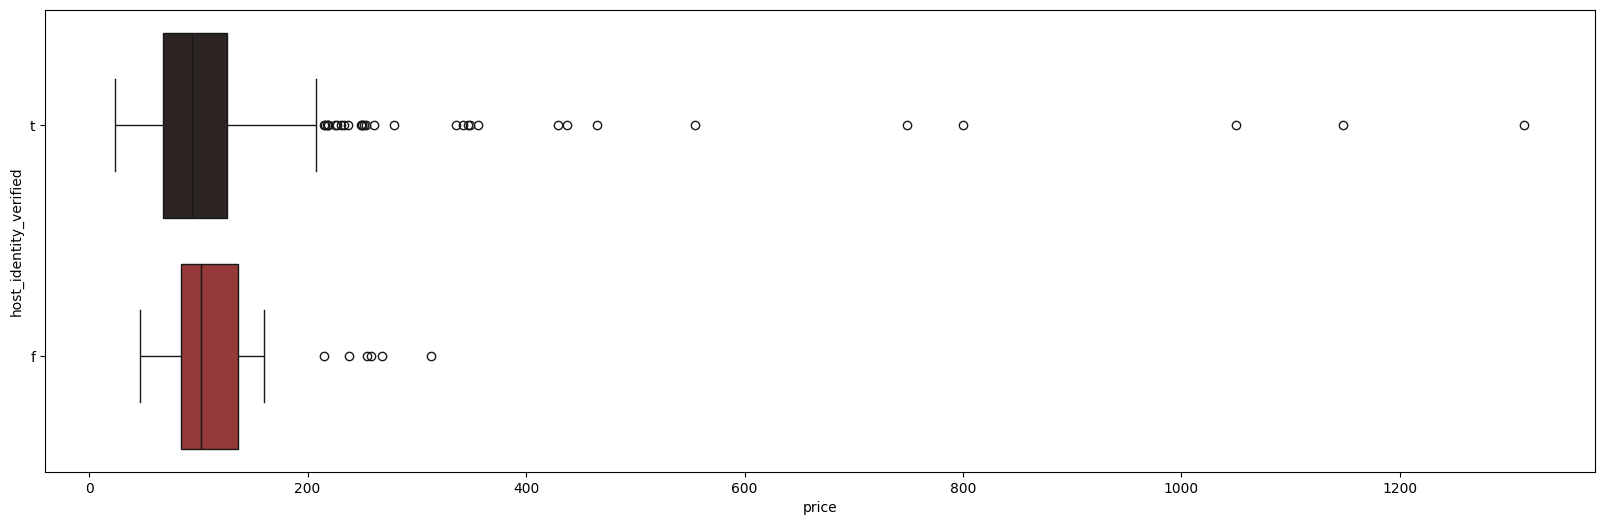

In [7]:
plt.figure(figsize=(20,6))
sns.boxplot(x=df['price'],y=df['host_identity_verified'],data=df,color='brown',hue='host_identity_verified')
plt.xlabel('price')
plt.ylabel('host_identity_verified')
plt.show()

#### From this we infer that Airbnb's at a higher price range were only booked if the host is verified.

### @Price by Room-type

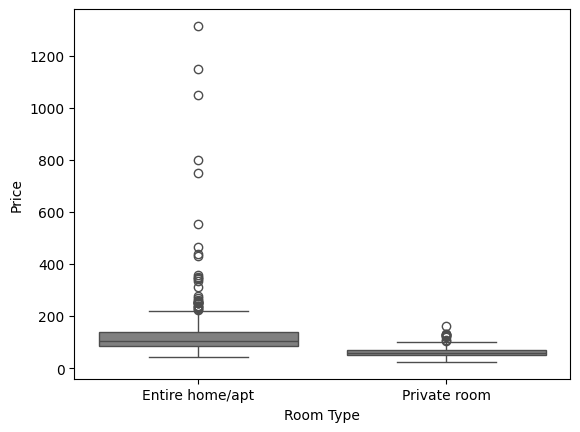

In [8]:
sns.boxplot(x=df['room_type'],y=df['price'],data=df,color='grey')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

#### This boxplot suggests that Entire home/apartments are available as bnb's in a majority at various prices which range from moderately high to uber-rich luxury. This goes to show the demand of Entire homes as airbnb amongst people.

### @Scatter for price v/s accommodates

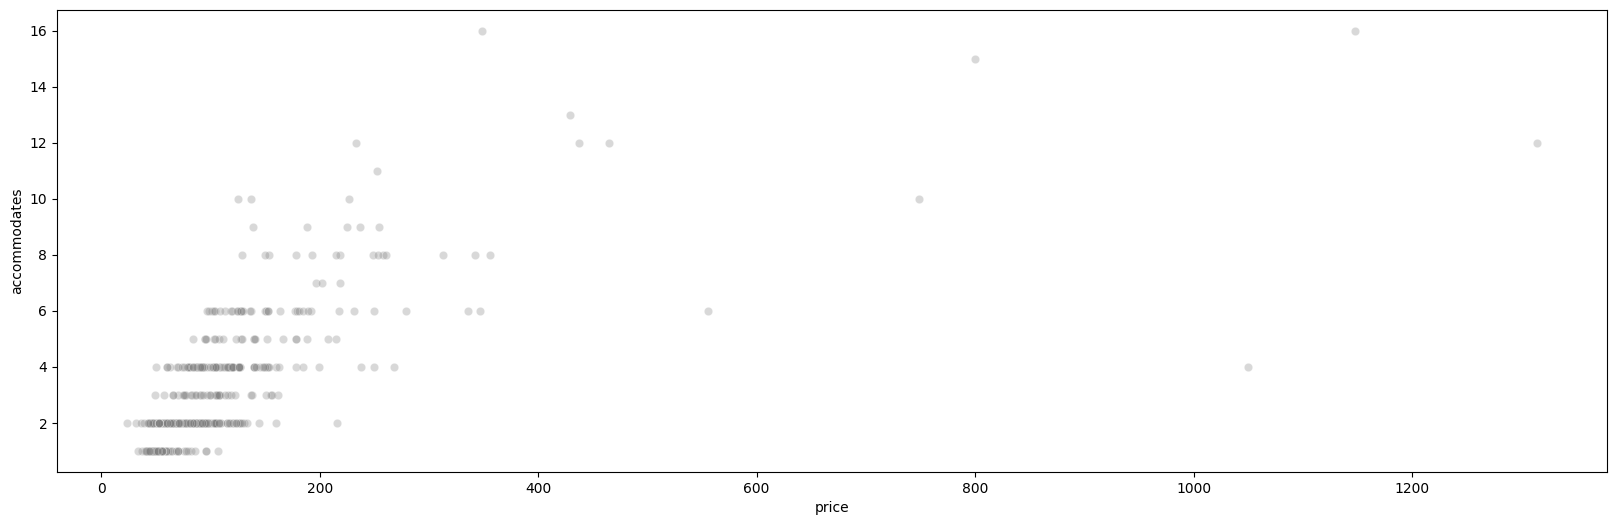

In [9]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='price',y='accommodates',data=df,color='grey',alpha=0.3)
plt.xlabel('price')
plt.ylabel('accommodates')
plt.show()

#### The scatterplot tells us that a majority of availavle bnbs have a 1-6 person accommodation capacity and are available at some of the lowest prices. There are also a good amount of bnb's having a capacity of 6-9, but the cost of starts going upwards of ~$220 from there. Then there are only a few which offer both high accommodation and prices.

### @Prices v/s Bedrooms

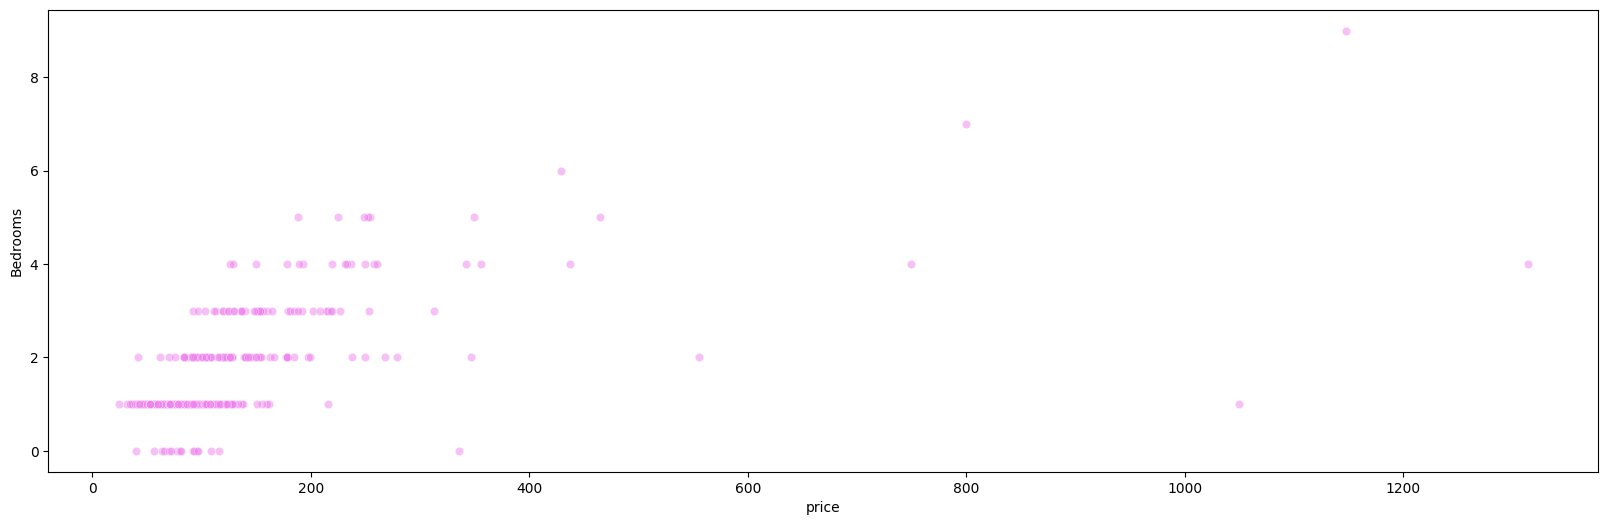

In [10]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='price',y='bedrooms',data=df,color='violet',alpha=0.5)
plt.xlabel('price')
plt.ylabel('Bedrooms')
plt.show()

#### This scatter plot tells us that airbnb's with upto 4 bedrooms are normal and available at resonable prices, though there are some at higher price ranges(maybe due to more amenities). As for 5-~6 bedrooms or more, they are at a variation of ranges from reasonable to very expensive.

### Price v/s Review Scores

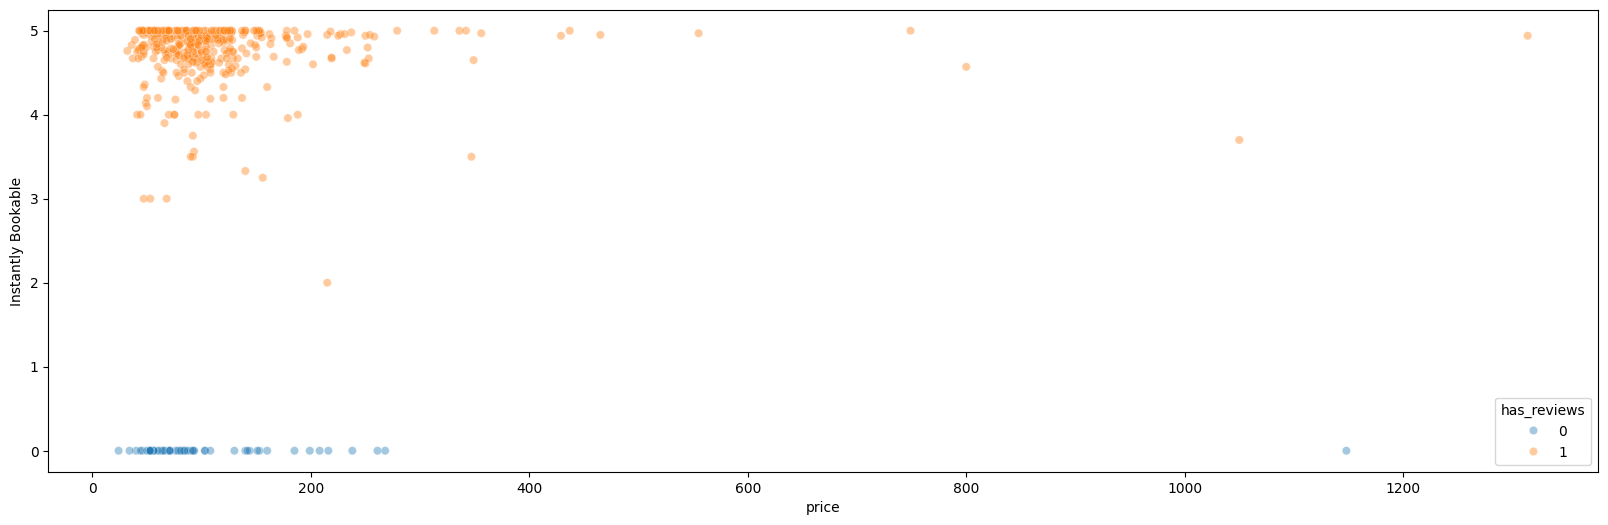

In [11]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='price',y='review_scores_rating',data=df,hue='has_reviews',alpha=0.4)
plt.xlabel('price')
plt.ylabel('Instantly Bookable')
plt.show()

#### The places which have been reviewed: Most reviewed places have a rating range of 4-5, this shows that people were satisfied with the overall conditions and services with lower priced places. There is also a place which is high priced(~$1100) but has a mediocre rating. On the other hand there is the most expensive place(~$1250+) with a statisfactory 5 rating score.

### Price v/s Host listings count shared rooms

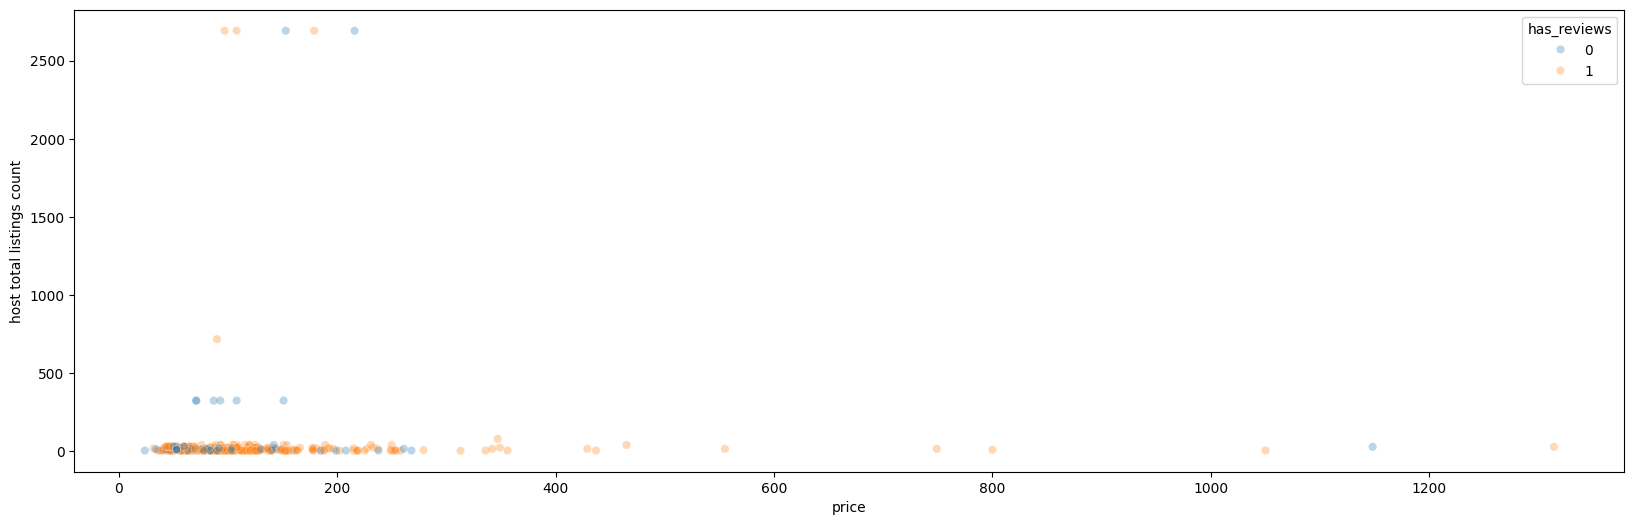

In [12]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='price',y='host_total_listings_count',alpha=0.3,hue='has_reviews',data=df)
plt.xlabel('price')
plt.ylabel('host total listings count')
plt.show()

### Plot for all the availability features

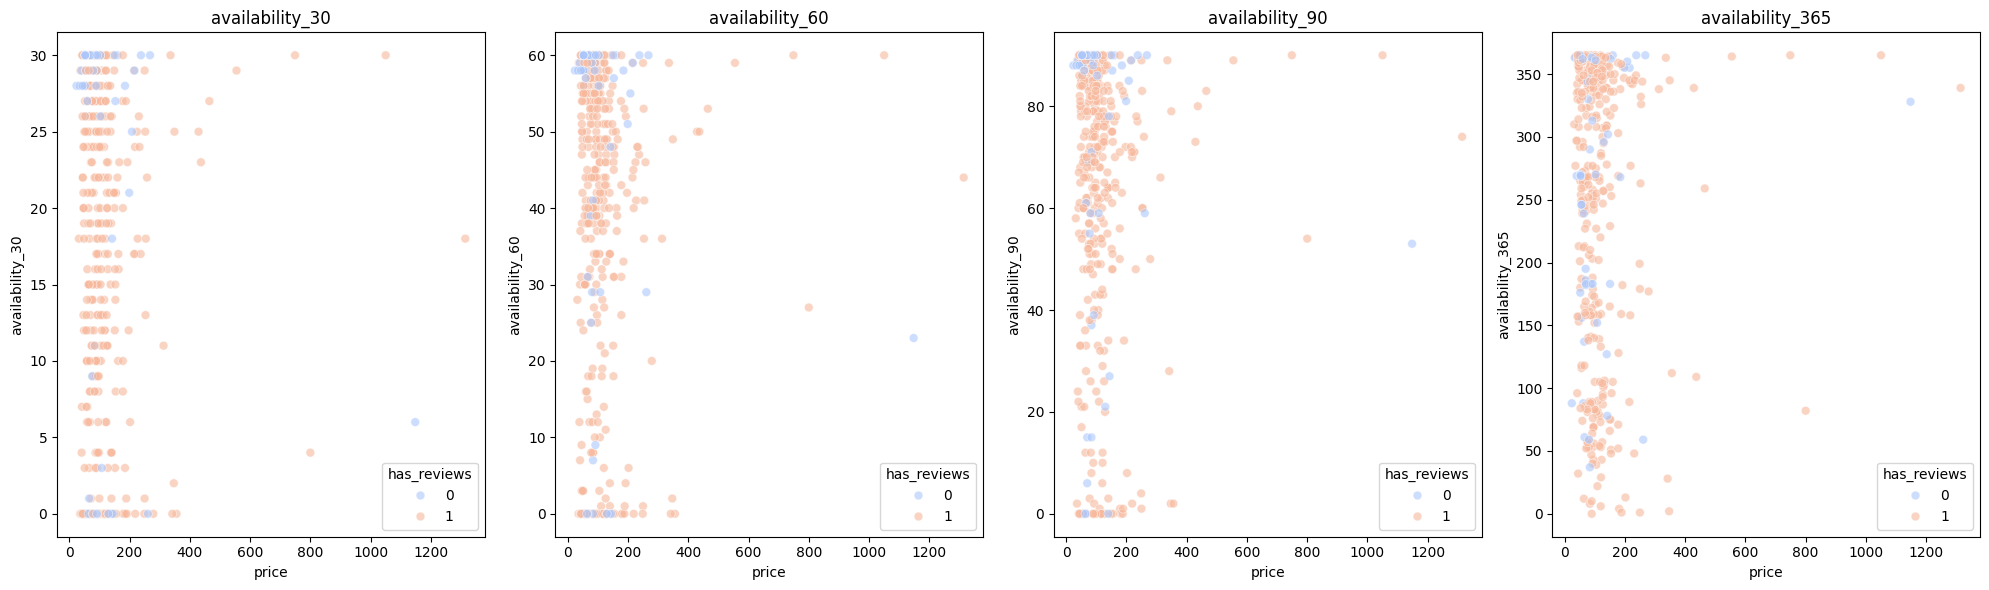

In [13]:
availability_cols = [ ### this one only was from AI
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365'
]

plt.figure(figsize=(20, 6))

for i, col in enumerate(availability_cols, 1):
    plt.subplot(1, 4, i)
    sns.scatterplot(
        x=df['price'],
        y=df[col],
        hue=df['has_reviews'],
        palette='coolwarm',
        alpha=0.6,
        s=40
    )
    plt.title(col)
    plt.xlabel('price')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### @Heatmap 1 (nights)

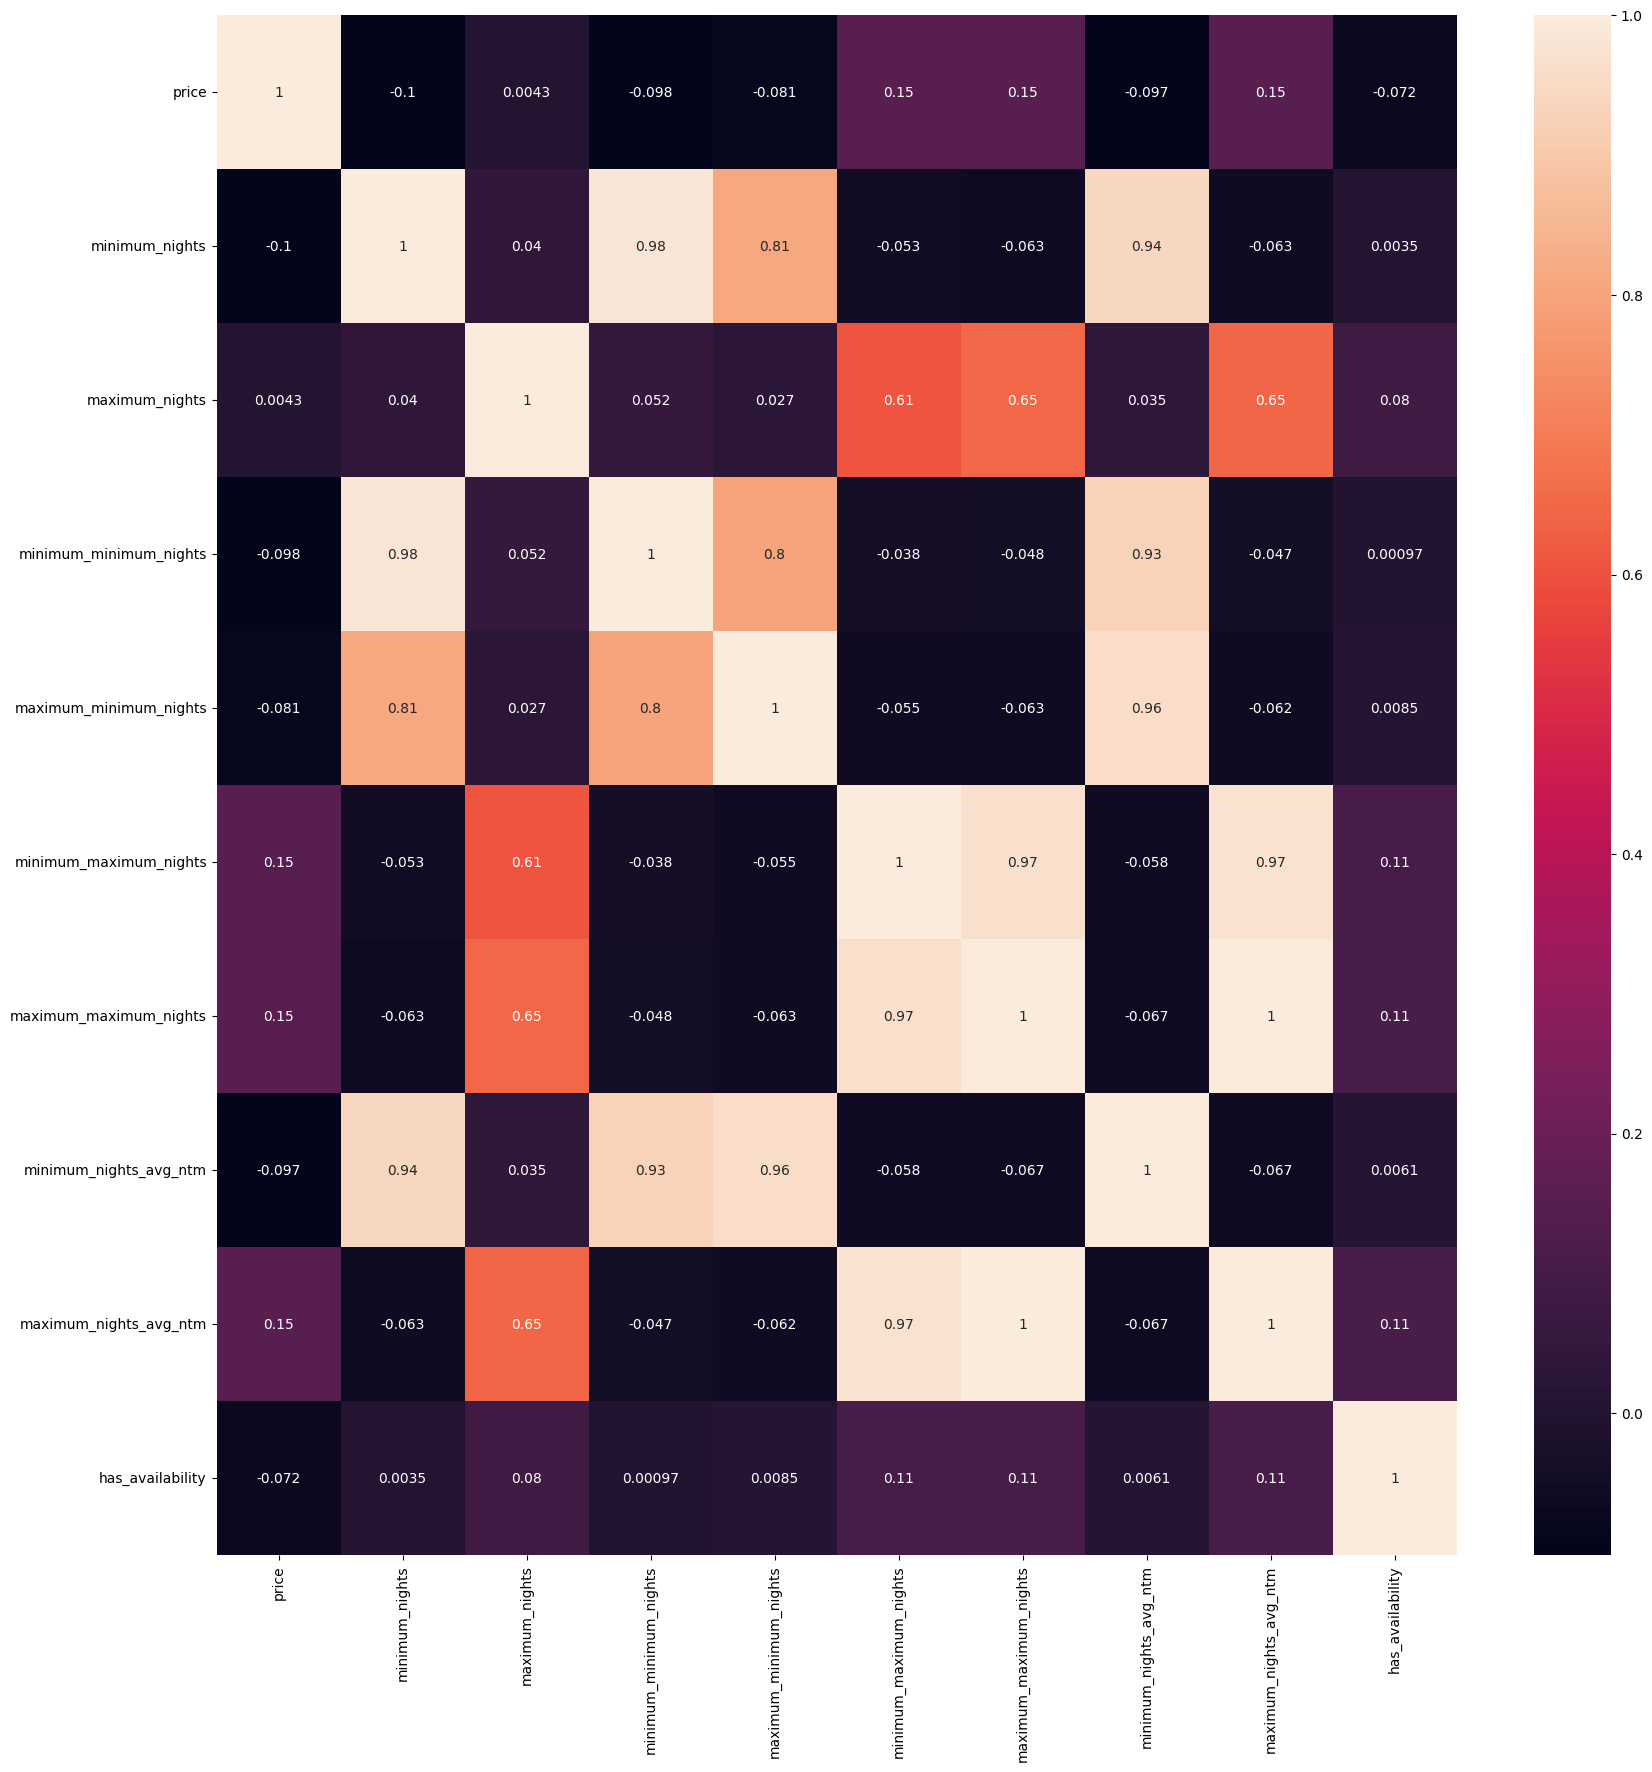

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df[['price','minimum_nights','maximum_nights'                
 ,'minimum_minimum_nights'       
 ,'maximum_minimum_nights'        
 ,'minimum_maximum_nights'        
 ,'maximum_maximum_nights'        
 ,'minimum_nights_avg_ntm'        
 ,'maximum_nights_avg_ntm'        
 ,'has_availability'  ]].corr(),annot=True)
plt.show()

### @Heatmap 2 (reviews)

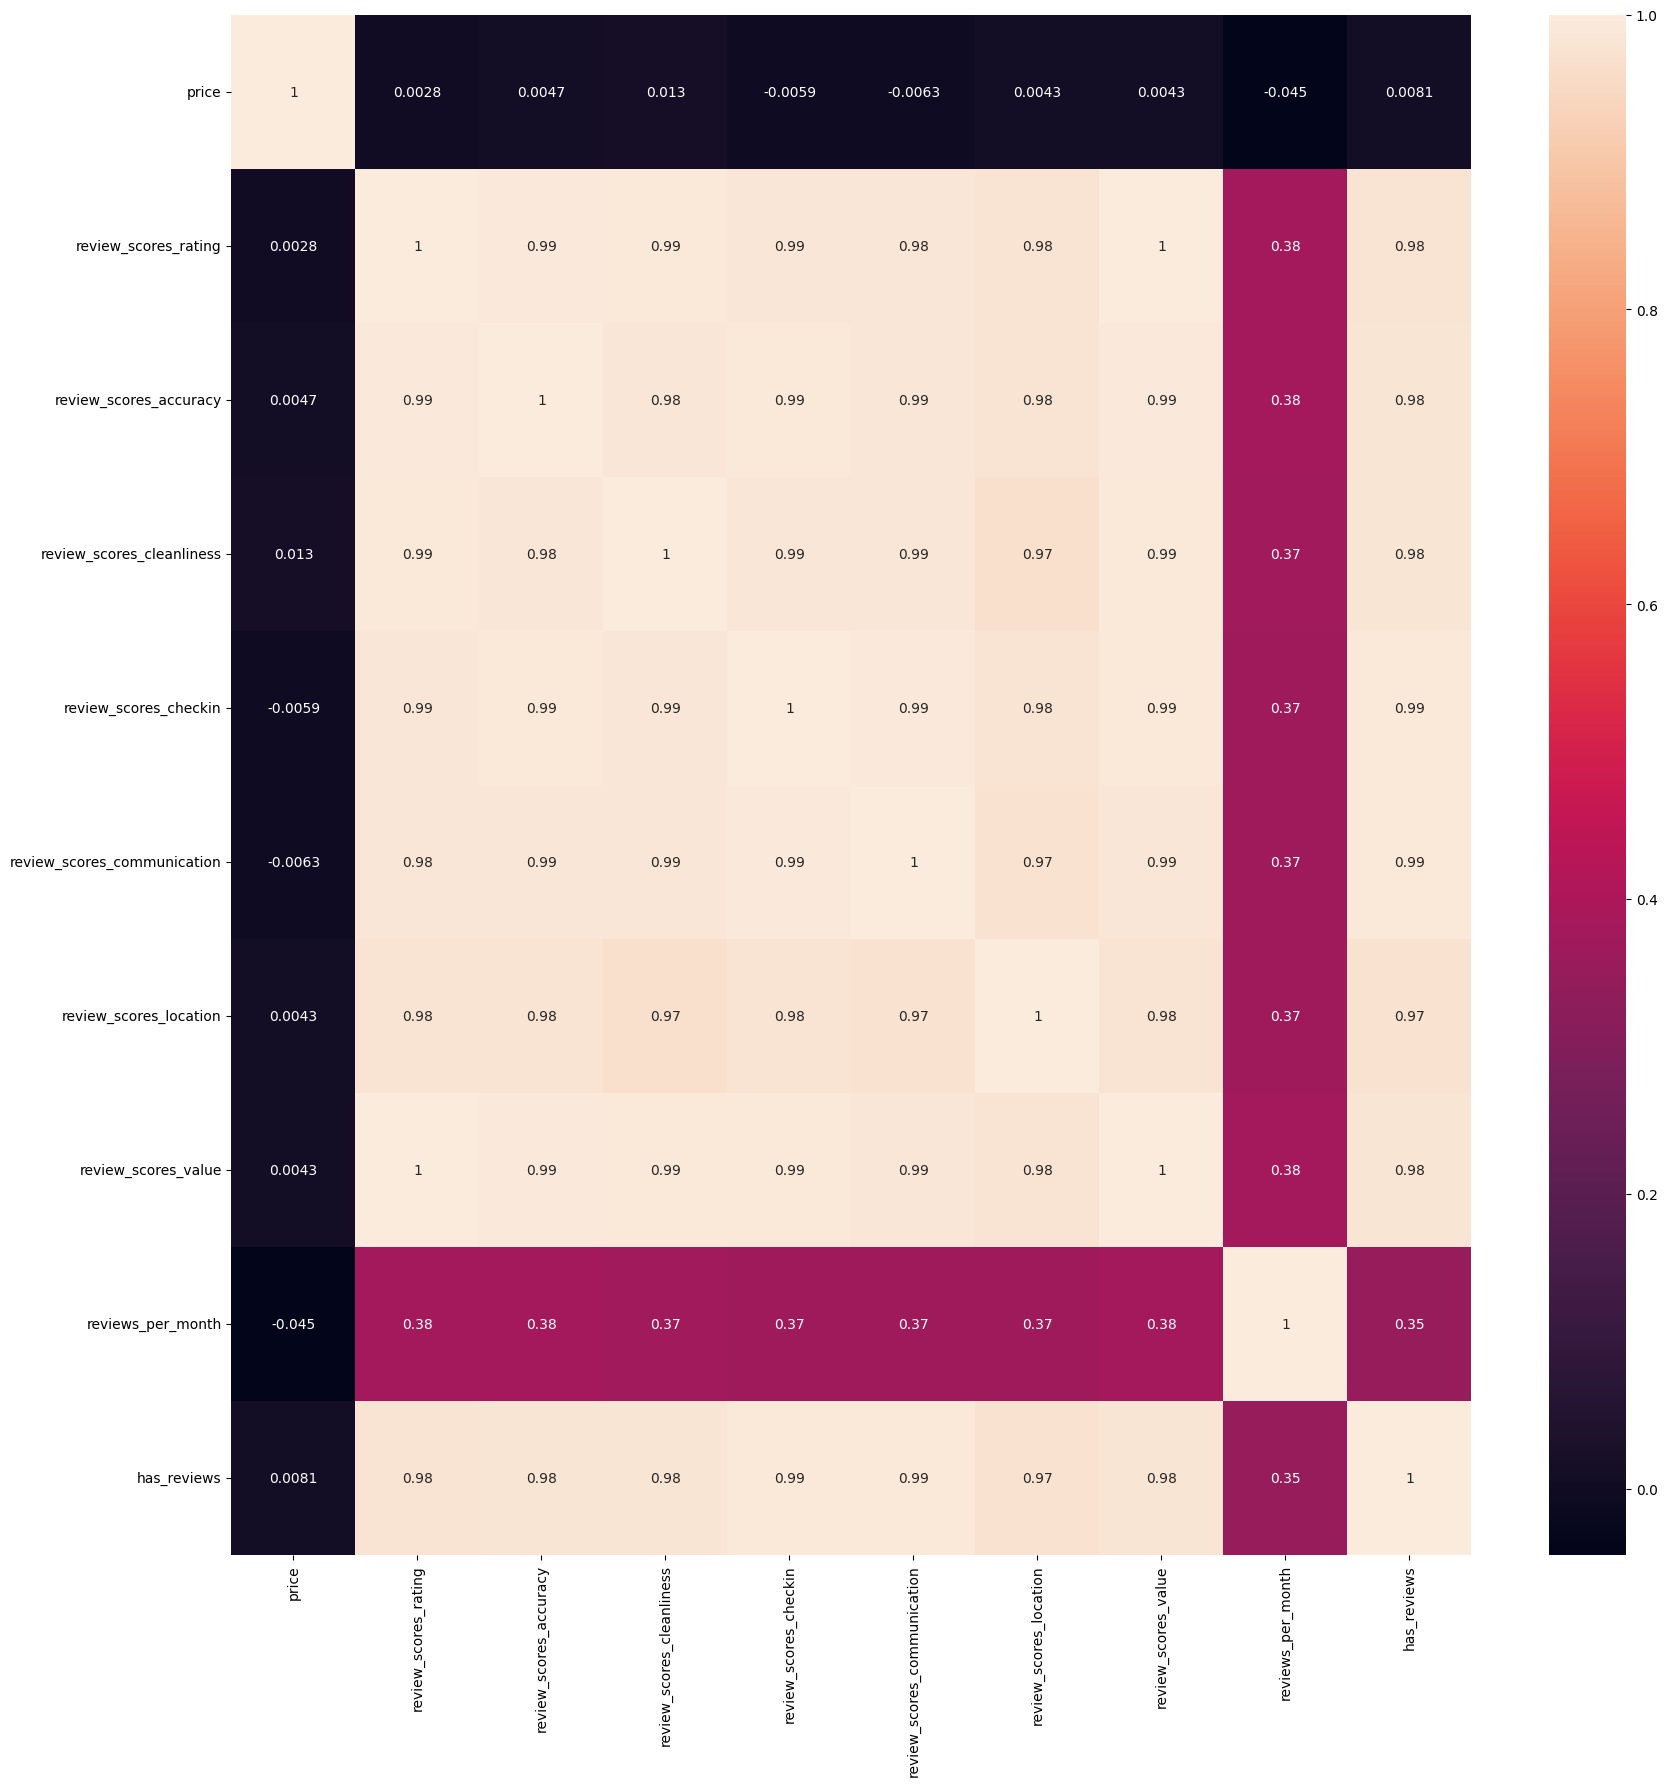

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df[['price','review_scores_rating',                         
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value','reviews_per_month','has_reviews'  ]].corr(),annot=True)
plt.show()

### @Heatmap 3 - Almost everything host related except for object dtypes

<Axes: >

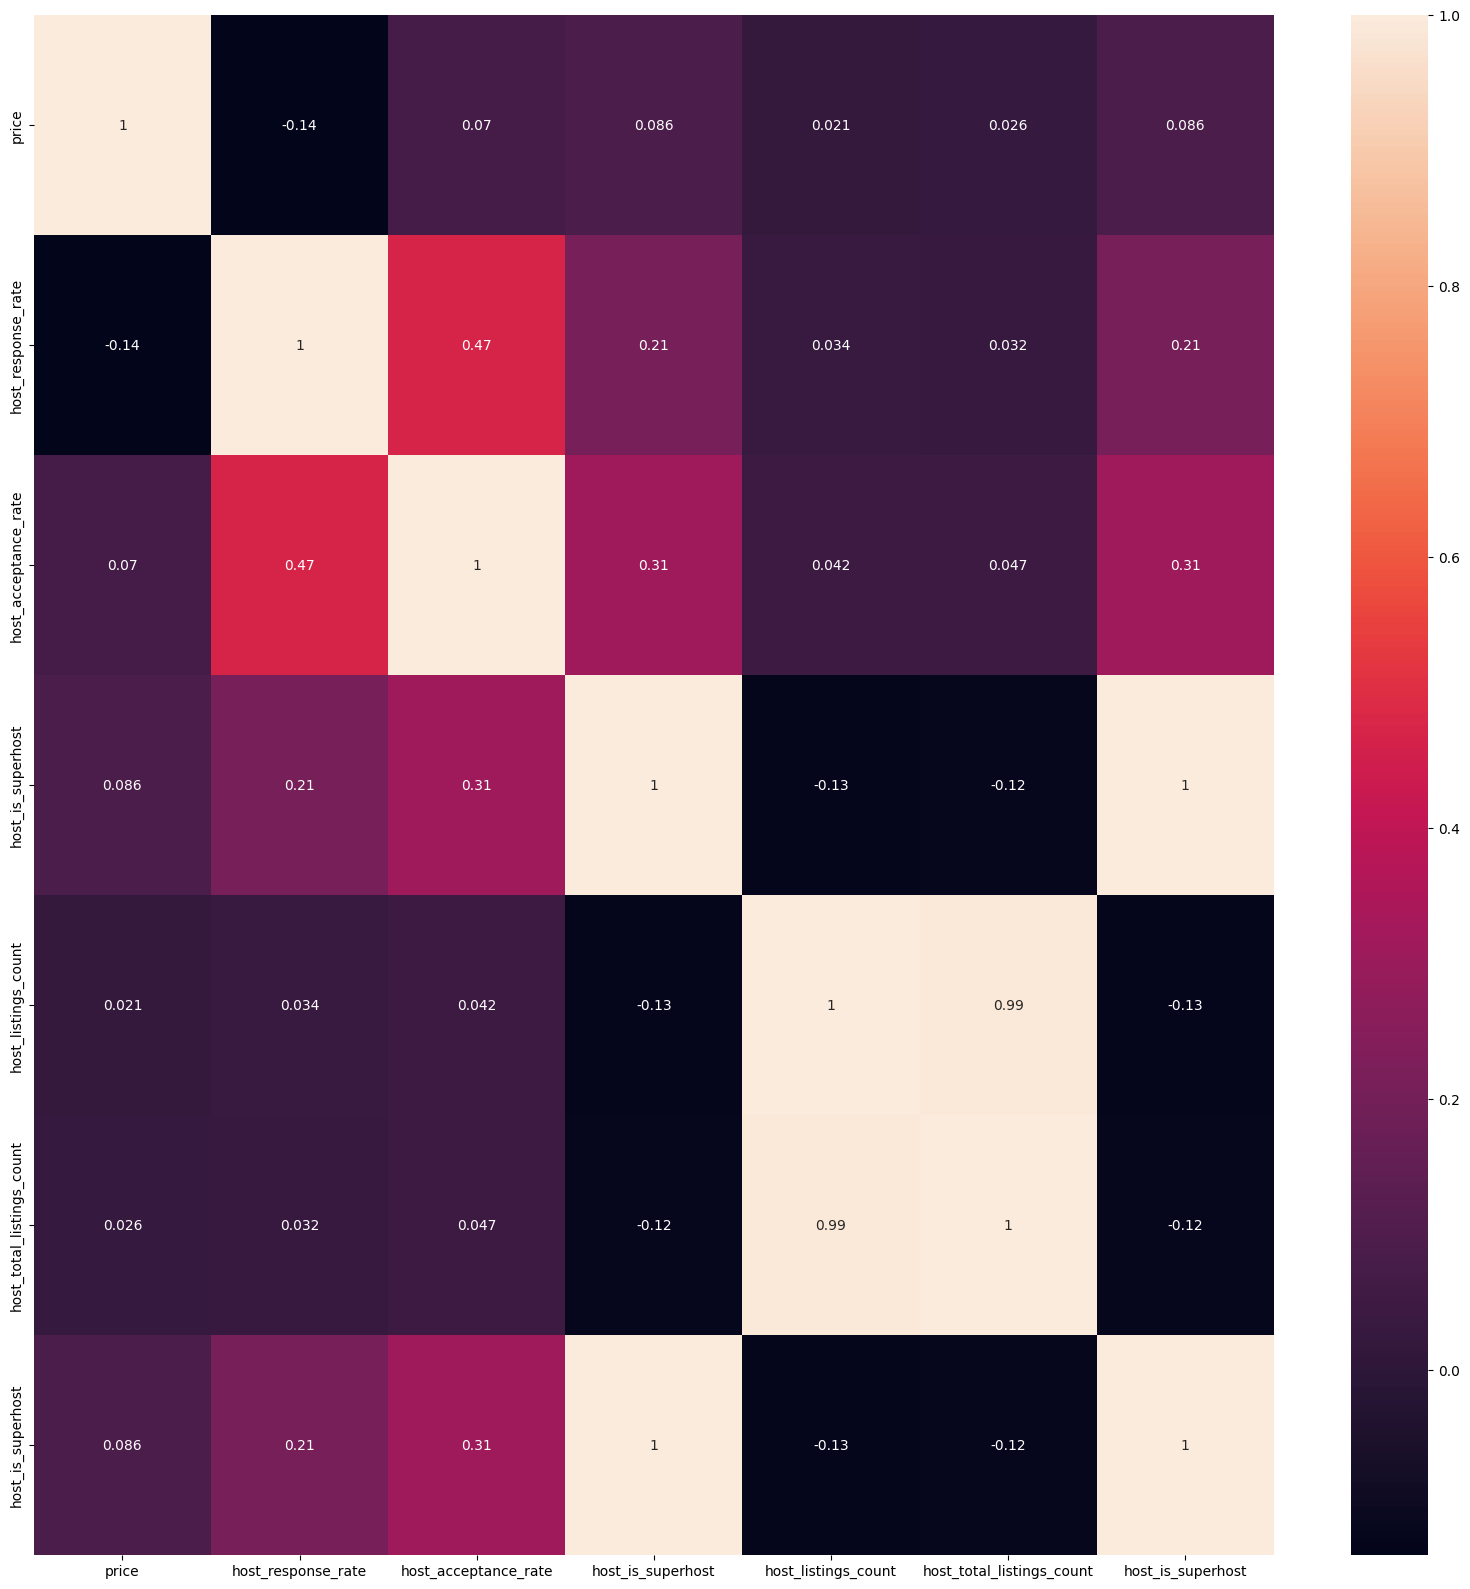

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df[['price','host_response_rate',                            
 'host_acceptance_rate'
 ,'host_is_superhost'  
 ,'host_listings_count'  
 ,'host_total_listings_count','host_is_superhost']].corr(),annot=True)

### @Heatmap 4 Major features that may affect price

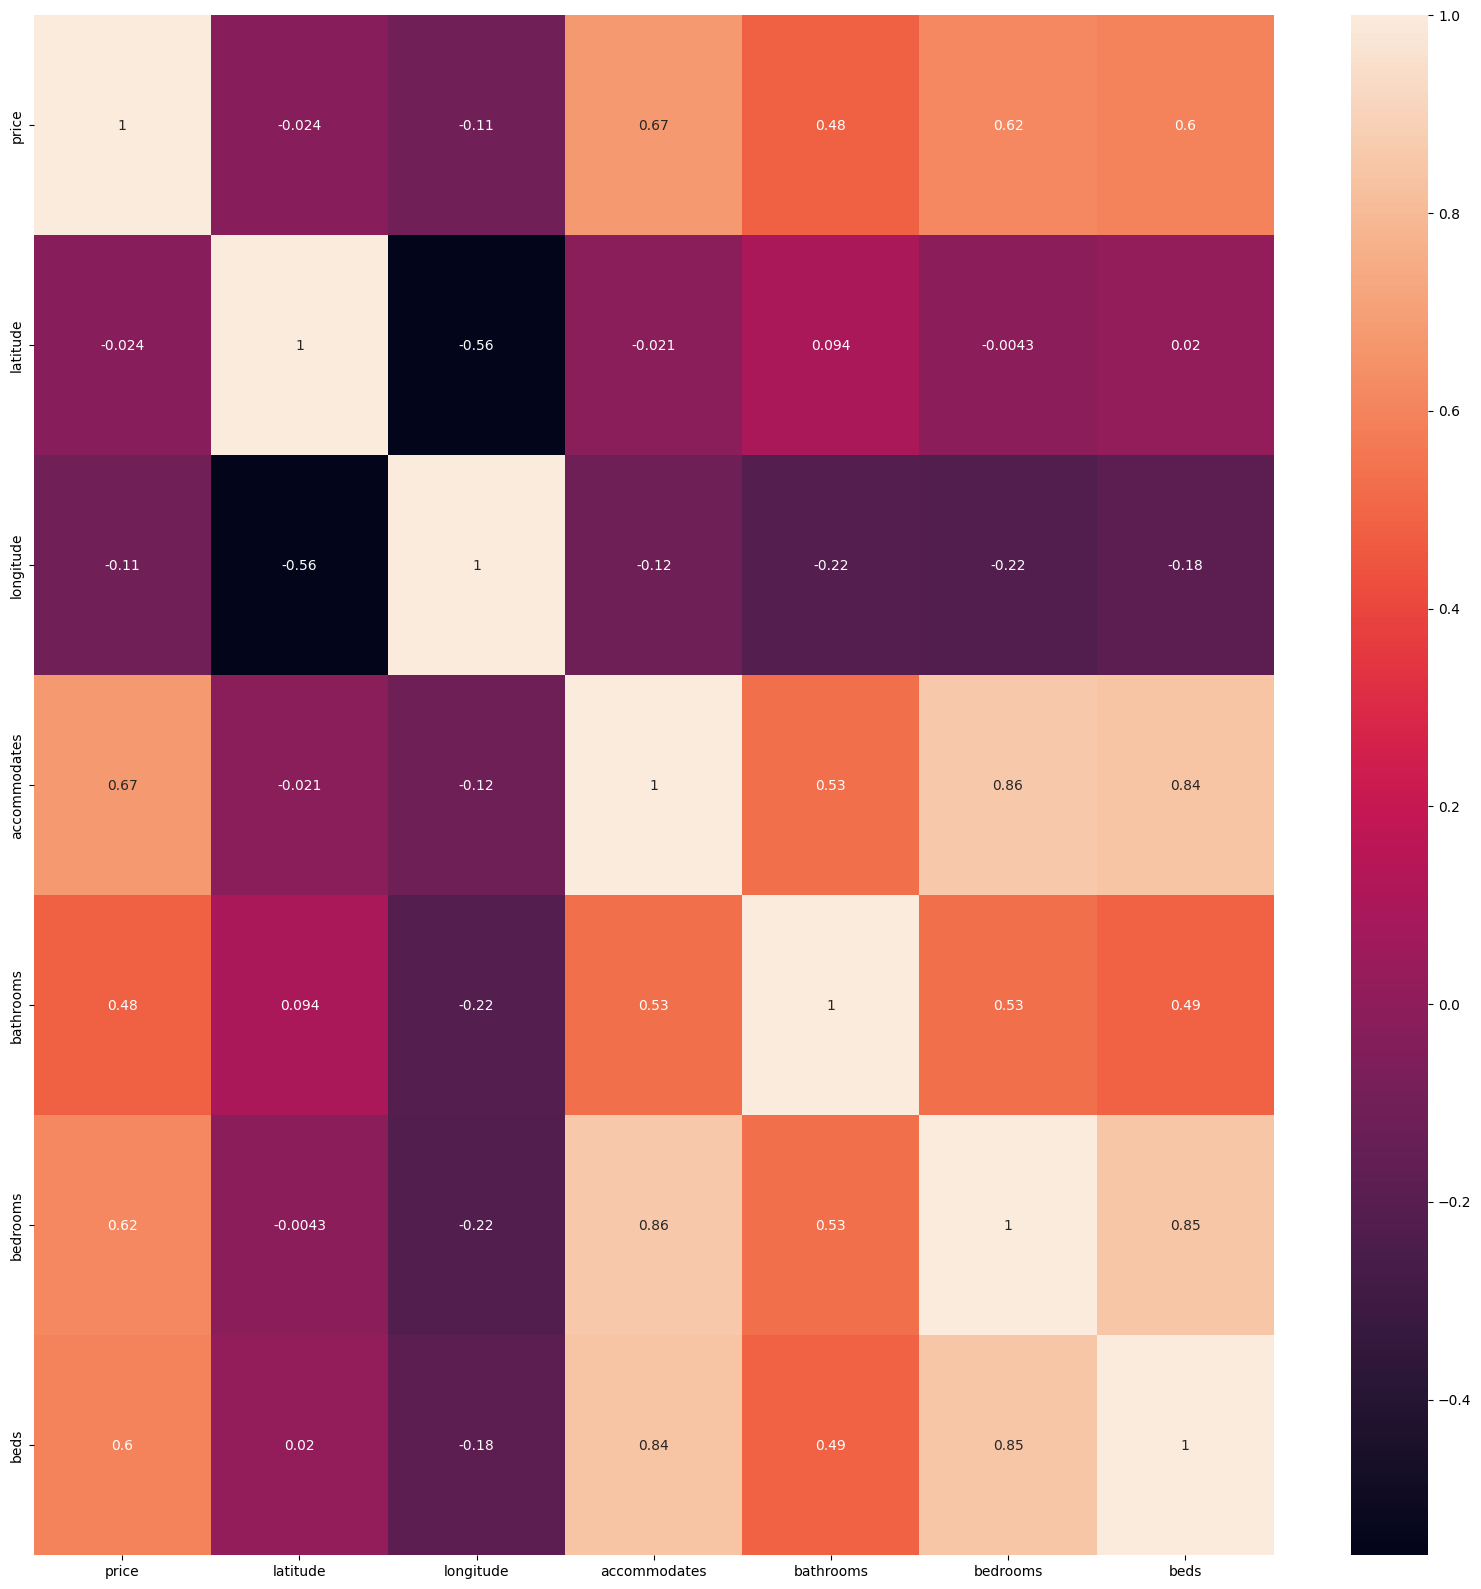

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(df[['price','latitude'                                      
,'longitude'
,'property_type'
,'room_type'
,'accommodates'
,'bathrooms'
,'bathrooms_text'
,'bedrooms'
,'beds'
,'amenities','instant_bookable']].corr(numeric_only=True),annot=True)
plt.show()

### @Heatmap 5 Leftovers

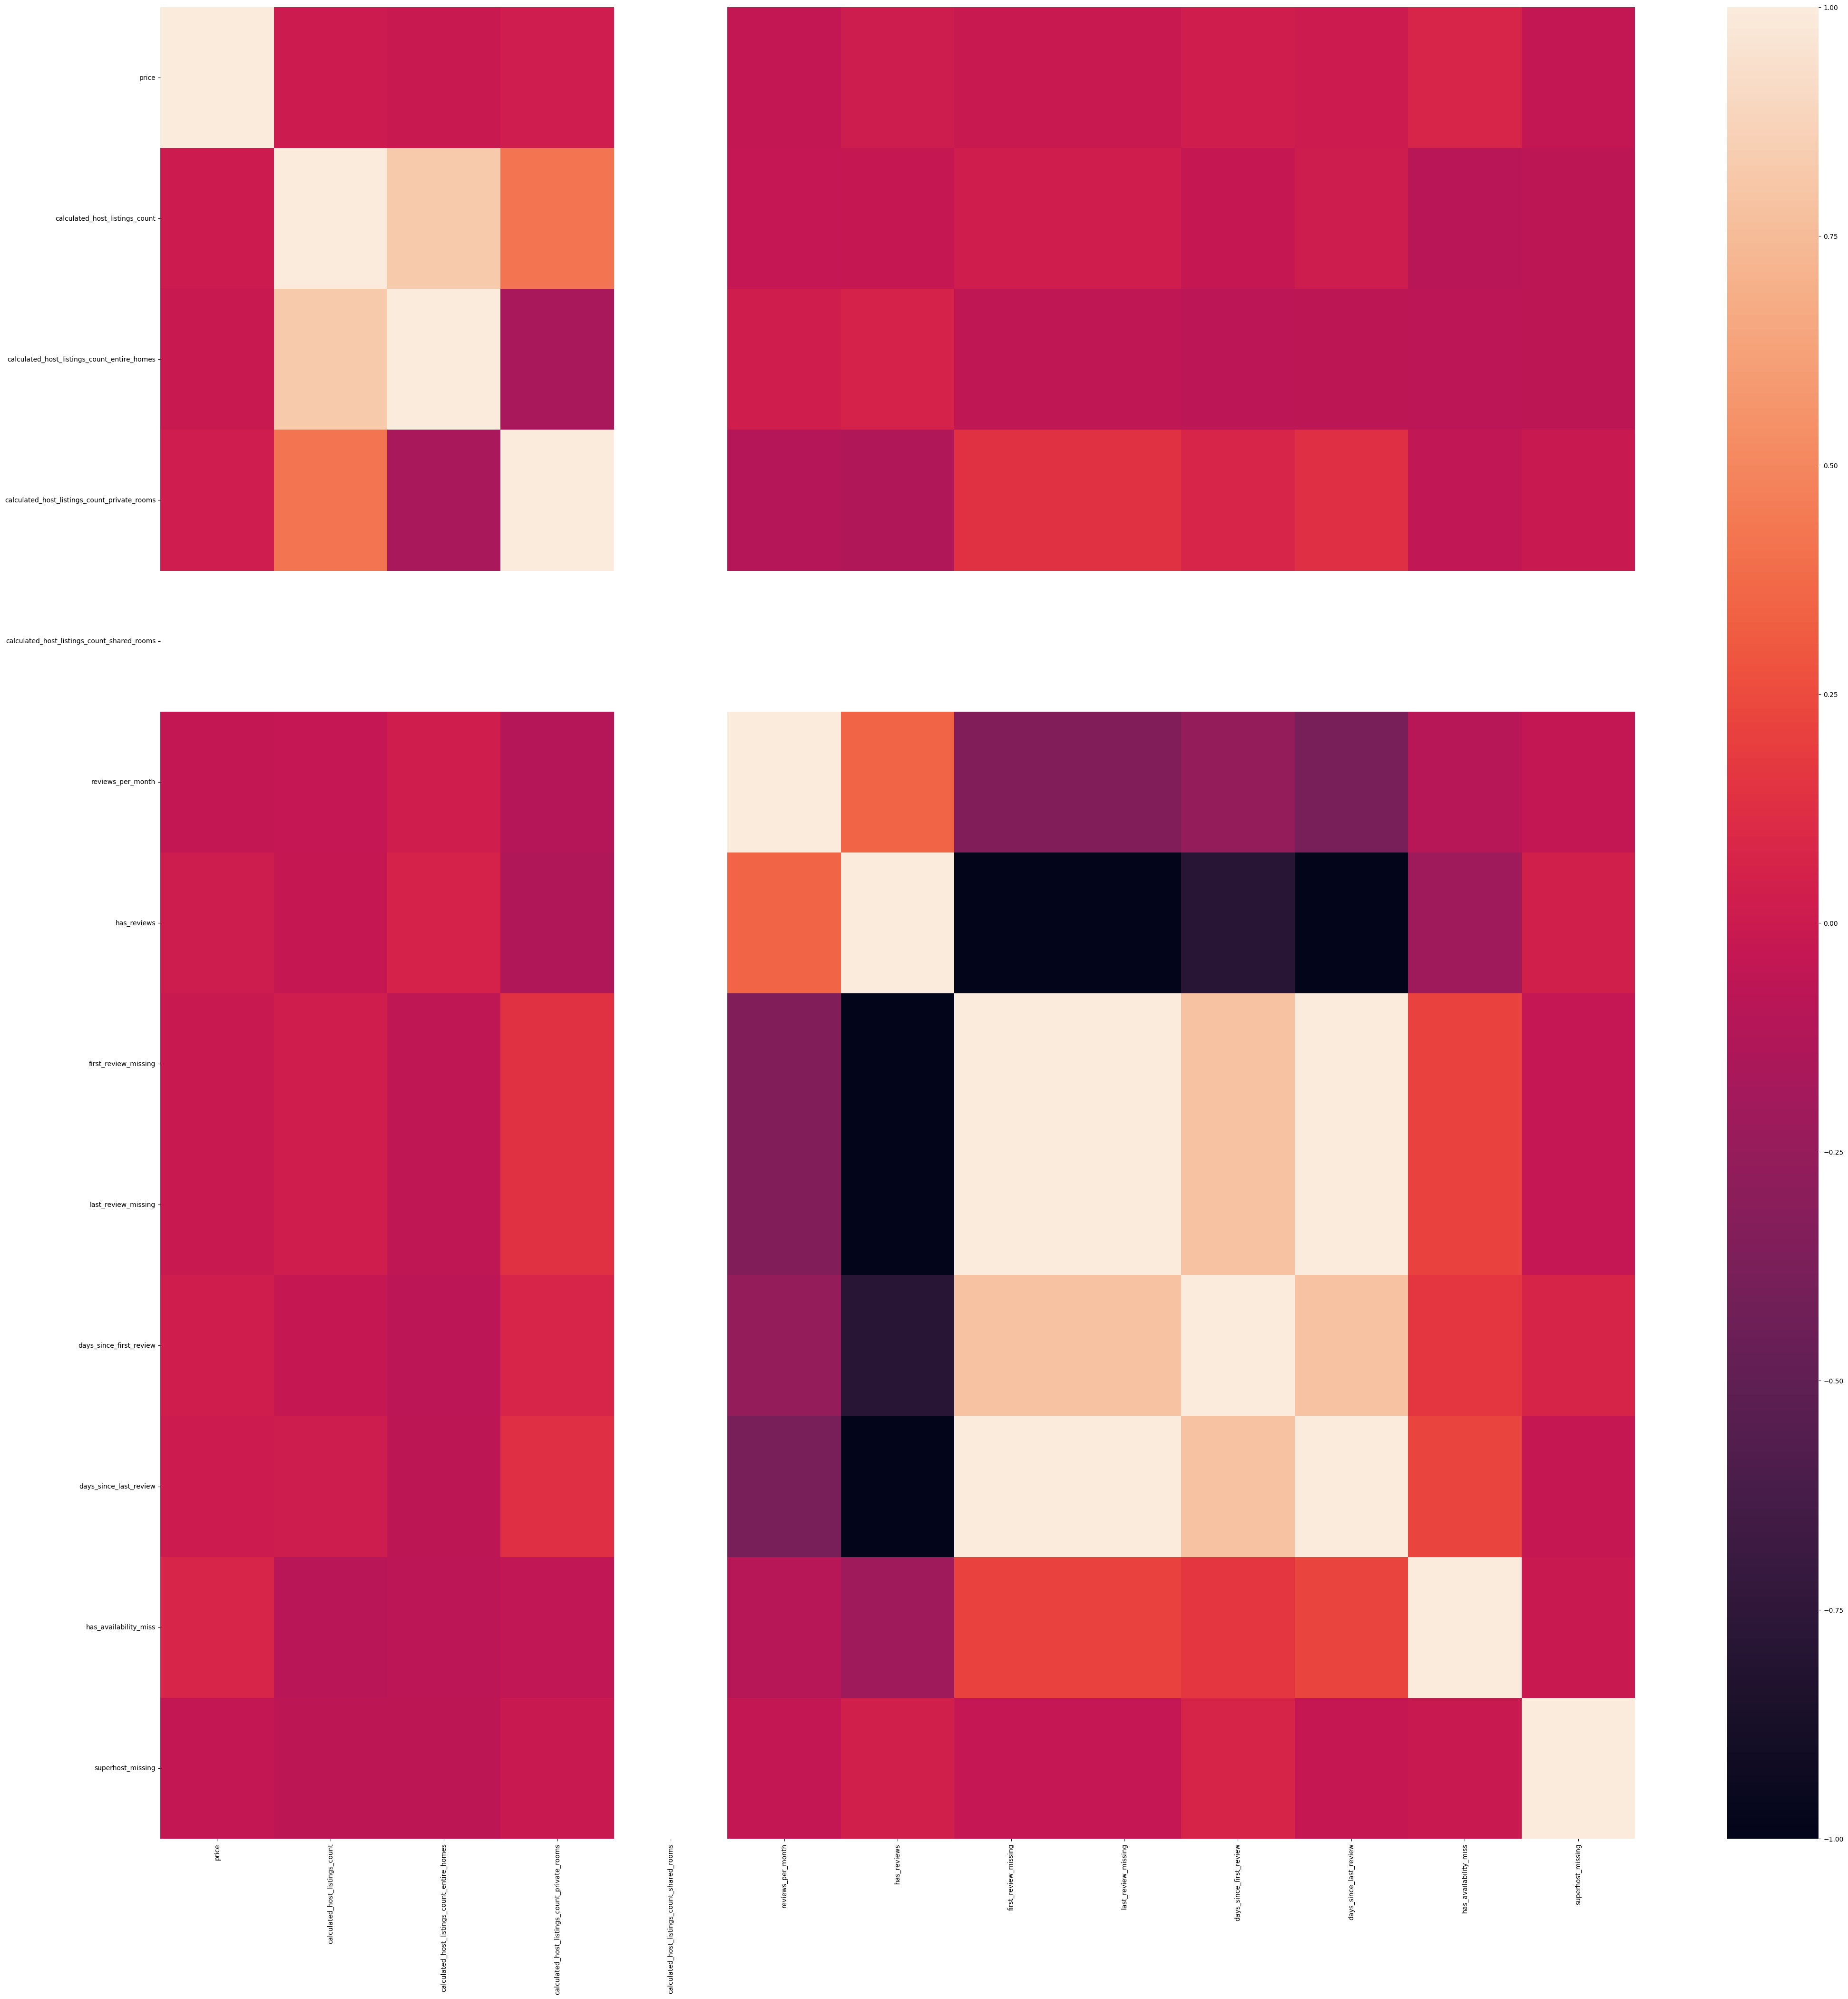

In [18]:
plt.figure(figsize=(50,50))
sns.heatmap(df[['price','calculated_host_listings_count'                
 ,'calculated_host_listings_count_entire_homes'  
 ,'calculated_host_listings_count_private_rooms'  
 ,'calculated_host_listings_count_shared_rooms'  
 ,'reviews_per_month'
 ,'has_reviews'  
 ,'first_review_missing'  
 ,'last_review_missing'  
 ,'days_since_first_review'  
 ,'days_since_last_review'  
 ,'has_availability_miss'  
 ,'superhost_missing'  
                ]].corr(numeric_only=True),annot=False)
plt.show()

#### We will be dropping the following features: 'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'.
#### Reason: They do not affect the price(target) at all or even if they do it's so little that the model will ignore them and they add noise rather than giving meaningful info.
#### Addtionally dropping 'first_review' and 'last_review', since we already engineered 'days_since_first_review' and 'days_since_last_review' and two more, so now, these dropped features are of no significant use for training.

In [19]:
df.drop(columns=['calculated_host_listings_count_entire_homes'  
 ,'calculated_host_listings_count_private_rooms'  
 ,'calculated_host_listings_count_shared_rooms','first_review','last_review'],inplace=True,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   last_scraped                    425 non-null    object 
 1   host_since                      425 non-null    object 
 2   host_response_time              425 non-null    object 
 3   host_response_rate              425 non-null    float64
 4   host_acceptance_rate            425 non-null    float64
 5   host_is_superhost               425 non-null    int64  
 6   host_listings_count             425 non-null    int64  
 7   host_total_listings_count       425 non-null    int64  
 8   host_has_profile_pic            425 non-null    object 
 9   host_identity_verified          425 non-null    object 
 10  neighbourhood_cleansed          425 non-null    object 
 11  latitude                        425 non-null    float64
 12  longitude                       425 

### @Heatmap 6 -Correlation between all the numeric/statistical features

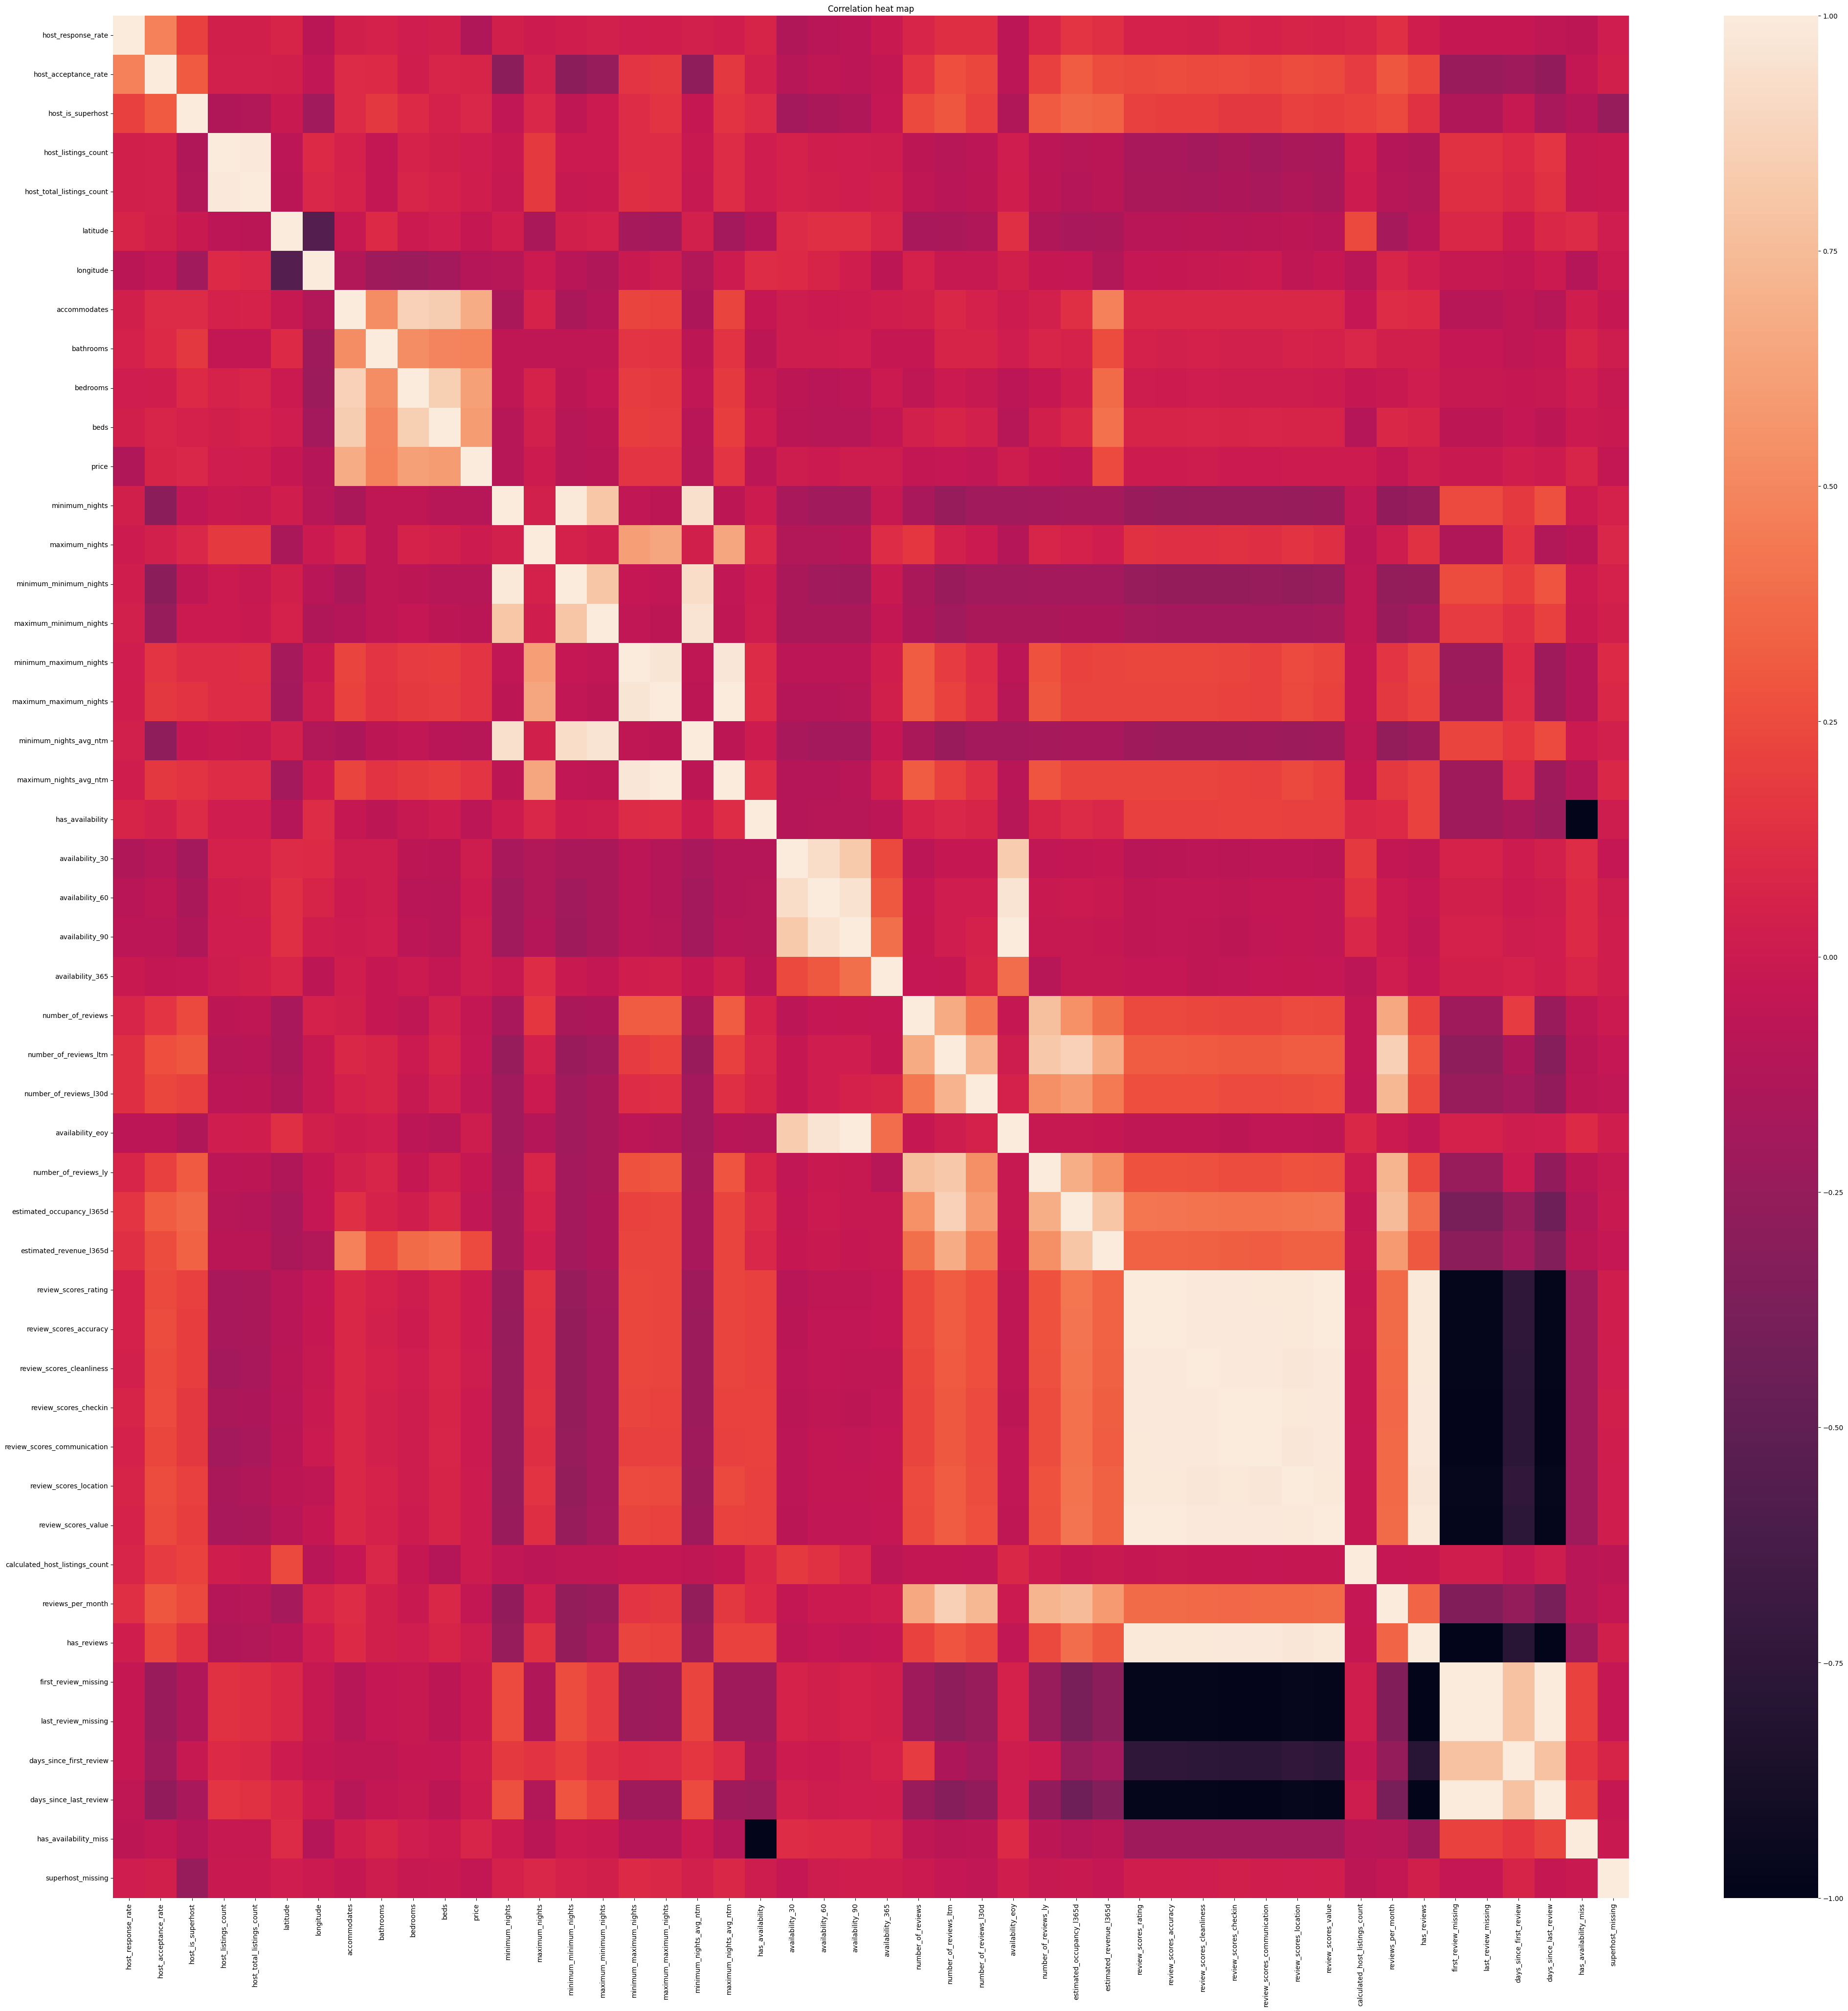

In [20]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(numeric_only=True),annot=False)
plt.title('Correlation heat map')
plt.show()

# End for EDA

## Now we prepare the dataset for modeling.


### conversion of remaining date containing features to datetime dtype.

In [21]:
df['last_scraped']=pd.to_datetime(df['last_scraped'])
df['host_since']=pd.to_datetime(df['host_since'])

In [22]:
df['host_tenure_days']=(pd.Timestamp.today()-df['host_since']).dt.days 
df['last_scraped_collected_days']=(pd.Timestamp.today()-df['last_scraped']).dt.days

In [23]:
df.drop(columns=['last_scraped','host_since'],inplace=True)

### Convert 't' & 'f' types to int or float

In [24]:
df['instant_bookable']=df['instant_bookable'].map({'t':1,'f':0})
df['host_has_profile_pic']=df['host_has_profile_pic'].map({'t':1,'f':0})
df['host_identity_verified']=df['host_identity_verified'].map({'t':1,'f':0})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 59 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_response_time              425 non-null    object 
 1   host_response_rate              425 non-null    float64
 2   host_acceptance_rate            425 non-null    float64
 3   host_is_superhost               425 non-null    int64  
 4   host_listings_count             425 non-null    int64  
 5   host_total_listings_count       425 non-null    int64  
 6   host_has_profile_pic            425 non-null    int64  
 7   host_identity_verified          425 non-null    int64  
 8   neighbourhood_cleansed          425 non-null    object 
 9   latitude                        425 non-null    float64
 10  longitude                       425 non-null    float64
 11  property_type                   425 non-null    object 
 12  room_type                       425 

In [283]:
df.to_csv('albany_nyc_cleansed_part_2.csv',index=False)

## Now only 6 object dtypes categorical features are left which will either be one-hot encoded or preprocessed in the mlpreprocessing part.

# End